# Harshit Yadav

# The Sparks Foundation

# Task3

## Exploratory Data Analysis on Superstore Data
## Objectives:-
## 1) To Perform Exploratory Data Analysis
## 2) Find out business problems
## 3) identify key areas for improving profits

In [348]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

# 1.Getting familiar with data

In [389]:
df=pd.read_csv('Task3.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [351]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [353]:
#Finding no. of unique categories in categorical features
for i,j in zip(range(df.shape[1]),df.columns):
    print(j,':',len(df.iloc[:,i].unique()))

Ship Mode : 4
Segment : 3
Country : 1
City : 531
State : 49
Postal Code : 631
Region : 4
Category : 3
Sub-Category : 17
Sales : 5825
Quantity : 14
Discount : 12
Profit : 7287


In [378]:
###checking if there is any NaN entry in df
df.isnull().values.any()

False

# 2.Exploratory Data Analysis

In [354]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## 2.1 Quantity and profit

<AxesSubplot:xlabel='count', ylabel='Quantity'>

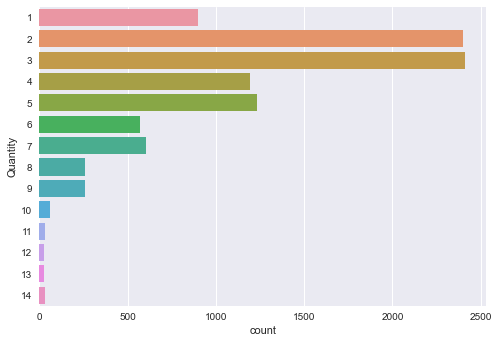

In [355]:
plt.style.use('seaborn')
sns.countplot(y=df['Quantity'])

### Most number of orders are of quantity 2 OR 3

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

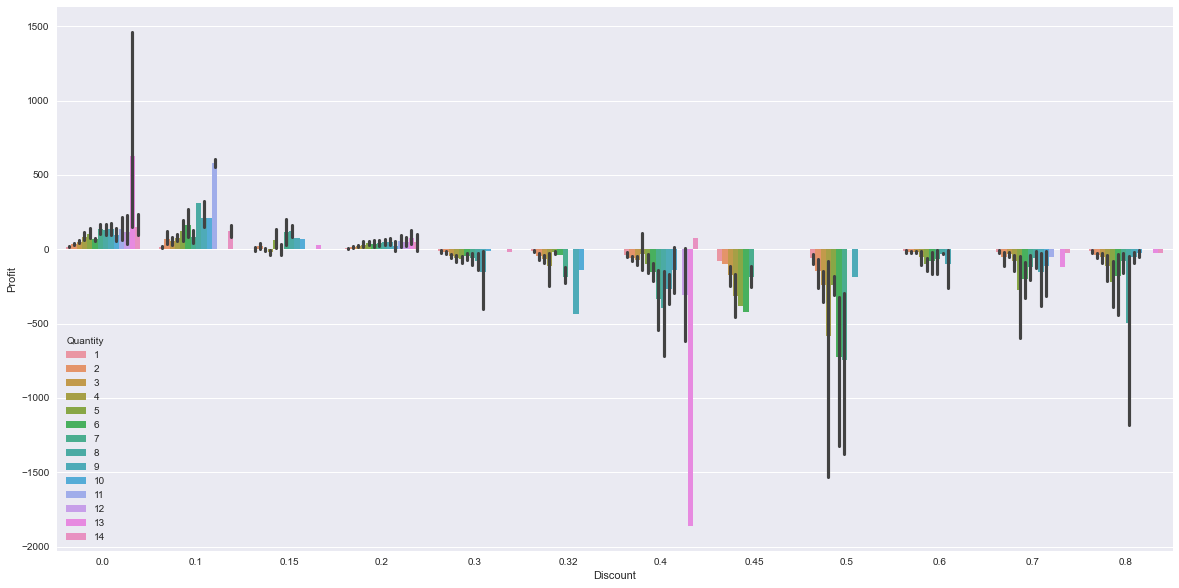

In [356]:
plt.style.use('seaborn')
plt.figure(figsize=(20,10))
sns.barplot(x=df['Discount'],y=df['Profit'],hue=df['Quantity'])

### Uptill the discount of 0.2 majority of orders were resulting in profit and maximum proffit was gained at 0 discount 

##  2.2 Discount


<AxesSubplot:xlabel='count', ylabel='Discount'>

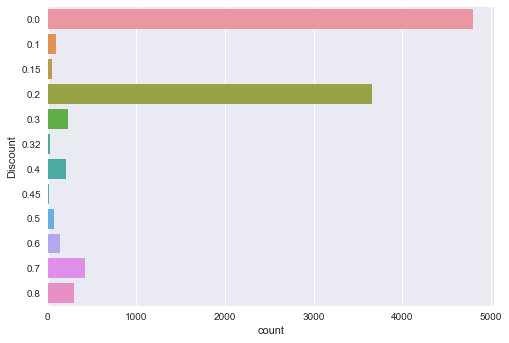

In [357]:
plt.style.use('seaborn')
sns.countplot(y=df['Discount'])

### mostly no discount is ggiven or 0.2 discount is given

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

<Figure size 1440x648 with 0 Axes>

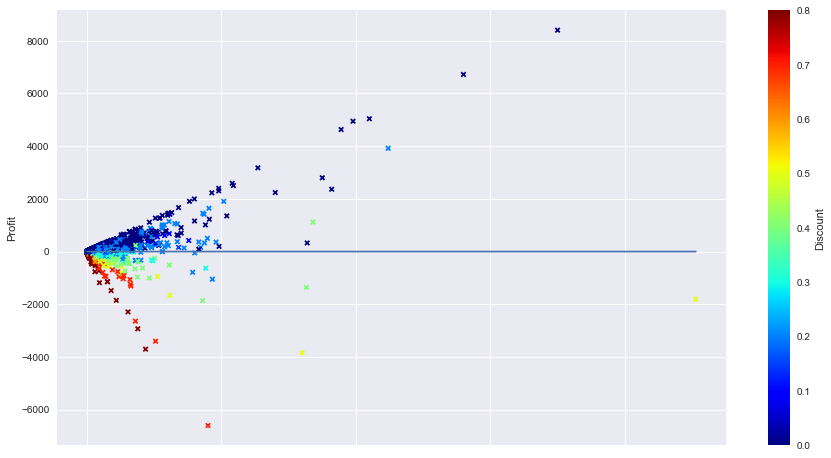

In [358]:
plt.style.use('seaborn')
plt.figure(figsize=(20,9))
#sns.scatterplot(x=df['Sales'],y=df['Profit'],hue=df['Discount'],s =50, marker ="x",colorm)
df.plot(kind = "scatter", figsize = (15,8), x = "Sales", y ="Profit" ,c ="Discount", s =20, marker ="x",colormap ="jet")
sns.lineplot(y=0,x=df['Sales'])

### This plot shows that the heavy discount results in losses, if we increase the discount our profit does not go up neither the sale

  ## 2.3 Profit , Sales with respect to categories

In [359]:
def profit_sales(x,data):
    dfi=pivot=pd.pivot_table(data,index=x,values='Sales')
    dfj=pivot=pd.pivot_table(data,index=x,values='Profit')
    index=1
    width=1
    plt.bar(x=dfj.index,height=dfj['Profit'],width=0.5)
    plt.bar(x=dfi.index,height=dfi['Sales'],width=0.3)
    plt.title(f'Sales(Green),Profit(Blue) VS {x}')

### 2.3.1 Profit,Sales and shipping method

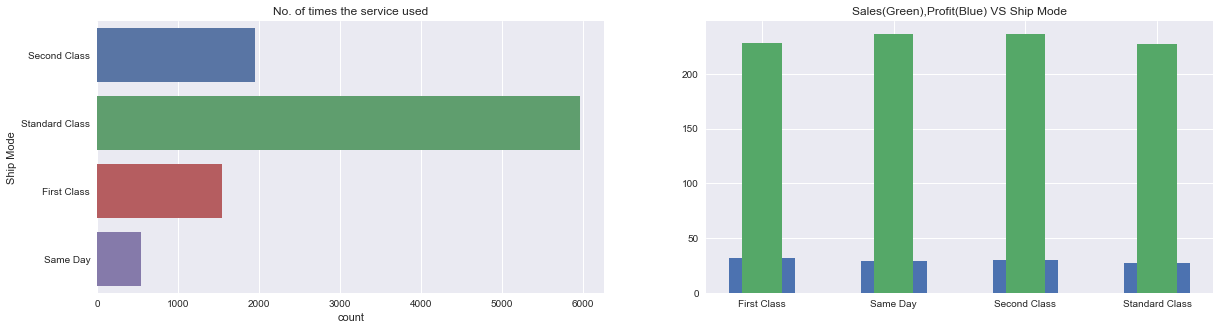

In [360]:
plt.style.use('seaborn')
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(y=df['Ship Mode'])
plt.title('No. of times the service used')
plt.subplot(1,2,2)
profit_sales('Ship Mode',df)

### There is not much difference in proffit but Standard class is the most used shipping mode but the sales are more or less same

### 2.3.2  Sales,Profit and Customer Segment

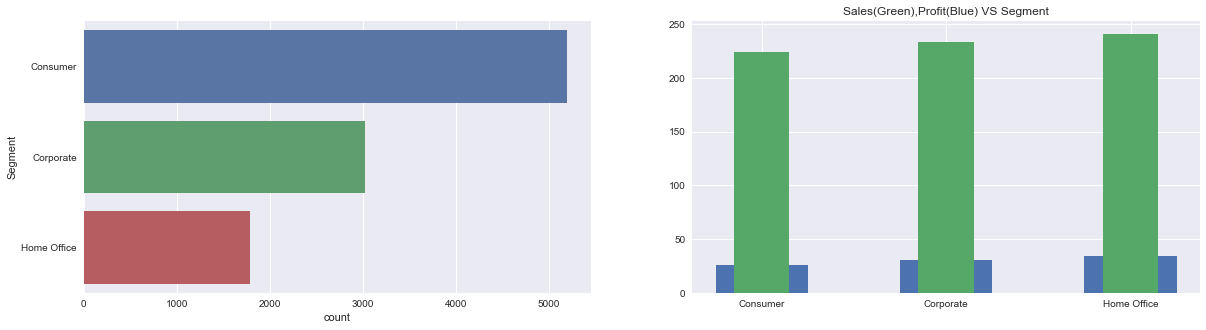

In [361]:
plt.style.use('seaborn')
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(y=df['Segment'])
plt.subplot(1,2,2)
profit_sales('Segment',df)

### Consumers are in large quantity but the sales and profit of Home office is highest

## 2.3.3 Sales,Profit and CIty (Top 10 cities by profit)

In [408]:
df_grouped_state=df.groupby('State').sum()
df_grouped_state=df_grouped_state.sort_values('Profit',ascending=False)[:10]
df_grouped_state

,Postal Code,Sales,Quantity,Discount,Profit
State,,,,,
California,184382639,457687.6315,7667,145.6,76381.3871
New York,11835721,310876.2710,4224,62.4,74038.5486
Washington,49661687,138641.2700,1883,32.4,33402.6517
Michigan,12356103,76269.6140,946,1.8,24463.1876
Virginia,5124335,70636.7200,893,0.0,18597.9504
Indiana,6991602,53555.3600,578,0.0,18382.9363
Georgia,5685480,49095.8400,705,0.0,16250.0433
Kentucky,5725336,36591.7500,523,0.0,11199.6966
Minnesota,4932224,29863.1500,331,0.0,10823.1874


Text(0.5, 0, 'State')

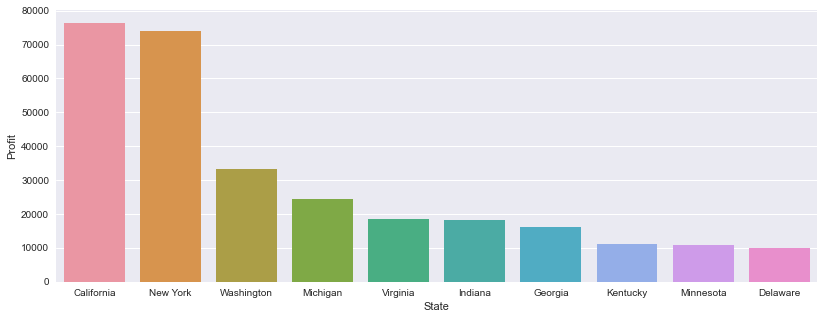

In [415]:
plt.style.use('seaborn')

plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
df1=df.City.value_counts(sort=True)[:10]
sns.barplot(x=df_grouped_state.index,y=df_grouped_state['Profit'])
plt.xlabel('State')



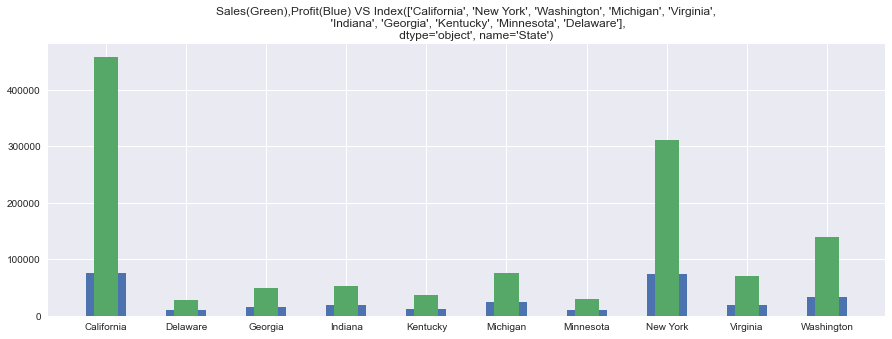

In [411]:
plt.style.use('seaborn')
plt.figure(figsize=(15,5))
profit_sales(df_grouped_state.index,df_grouped_state)

### Most no. of sales are placed from new california which is one of the highest profit returning city along with new york

### 2.3.4 Sales,Profit and Region

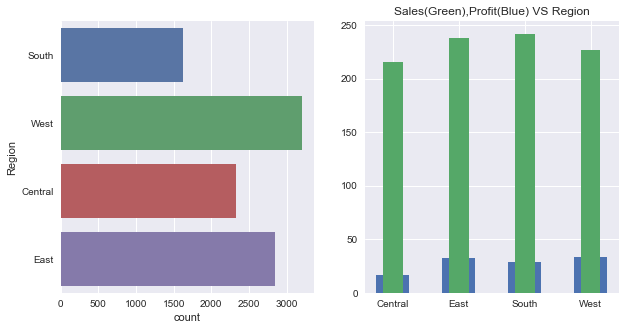

In [364]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(y=df['Region'])
plt.subplot(1,2,2)
profit_sales('Region', df)

### least no. of orders placed are from south region but  high return on profit and very high sale

## 2.3.5 Sales, Profit and Product Category

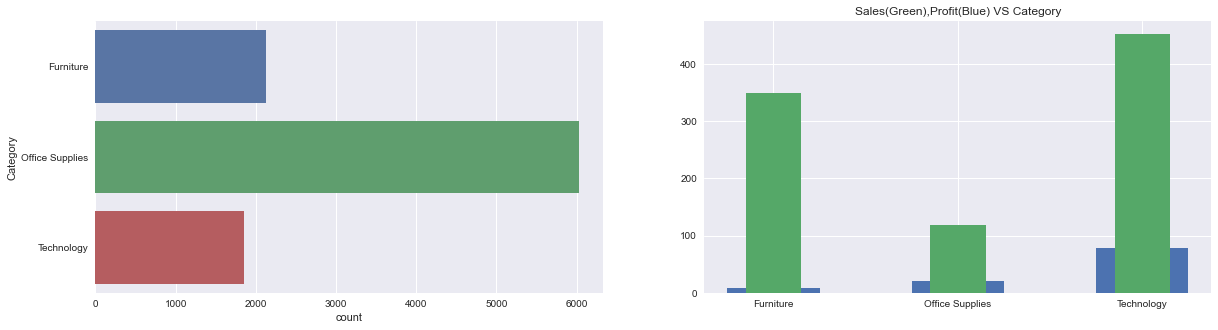

In [365]:
plt.style.use('seaborn')
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(y=df['Category'])
plt.subplot(1,2,2)
profit_sales('Category', df)

### Technology is the least ordered category but has the highest returns of profit and highest in sales

### 2.3.6 Sales,Profit and Sub Category

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

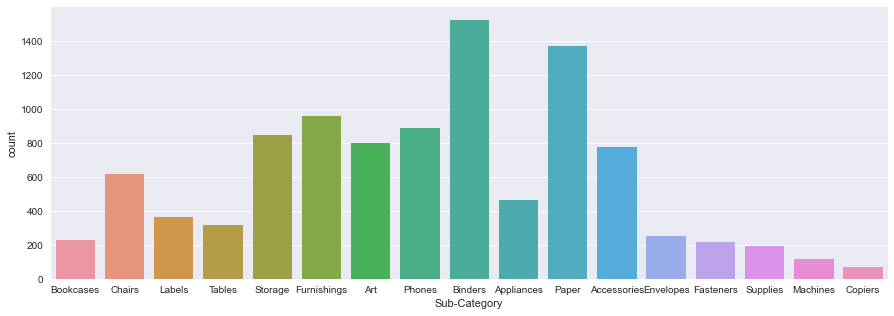

In [366]:
plt.style.use('seaborn')
plt.figure(figsize=(15,5))
sns.countplot(x=df['Sub-Category'])

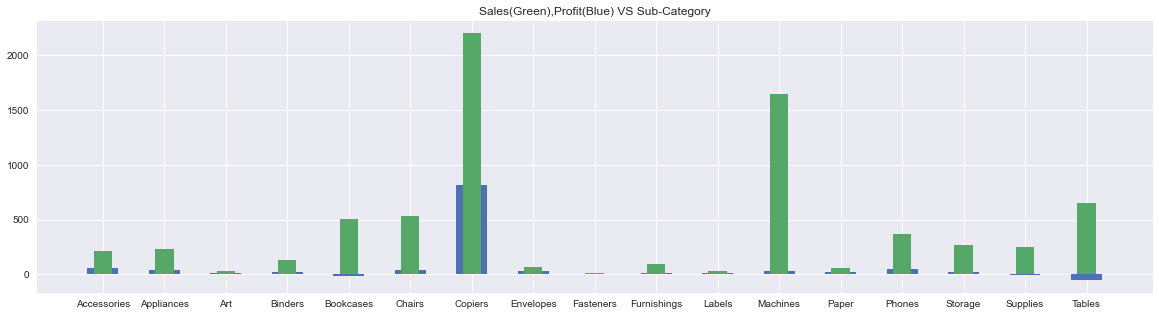

In [367]:
plt.style.use('seaborn')
plt.figure(figsize=(20,5))
profit_sales('Sub-Category', df)

### less no. of orders of copiers but very large sale and very high profit , we need to work on machine sector as it has really high sales but low profit and we are getting losses from tables

# 2.4 Regionwise analysis

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

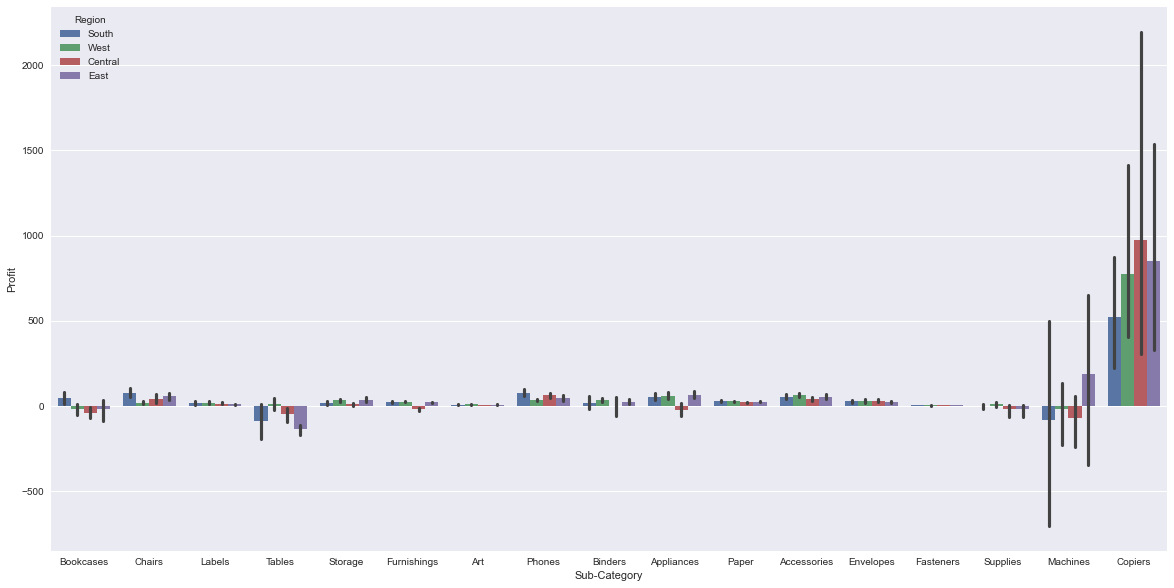

In [368]:
plt.style.use('seaborn')
plt.figure(figsize=(20,10))
sns.barplot(data = df , x = "Sub-Category",y = "Profit" ,hue = "Region")

### Same, Copiers are performing, tables and Bookcases are performing low, central region gives the highest sale for copiers, and in case of machinery sales need to be monitored in south and central region

<AxesSubplot:xlabel='Category', ylabel='Profit'>

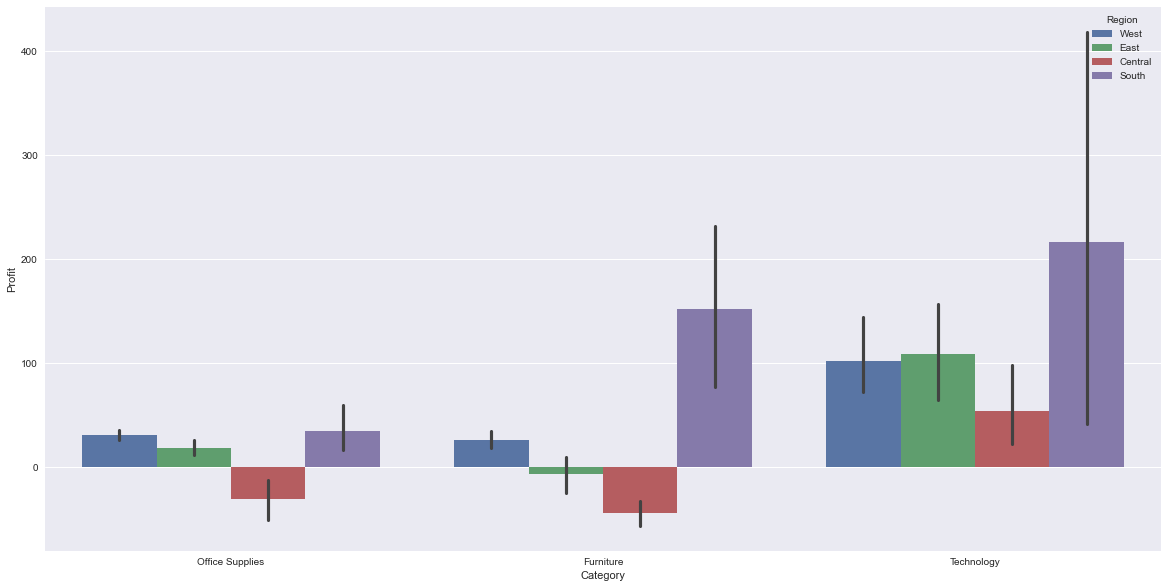

In [369]:
plt.style.use('seaborn')
plt.figure(figsize=(20,10))
sns.barplot(data = df2 , x = "Category",y = "Profit" ,hue = "Region")

### Most technology related items and furniture are bought from south region, and the sales of items in category "office Supply" and "Furniture" need to be monitored in the centeral region

<AxesSubplot:xlabel='Segment', ylabel='Profit'>

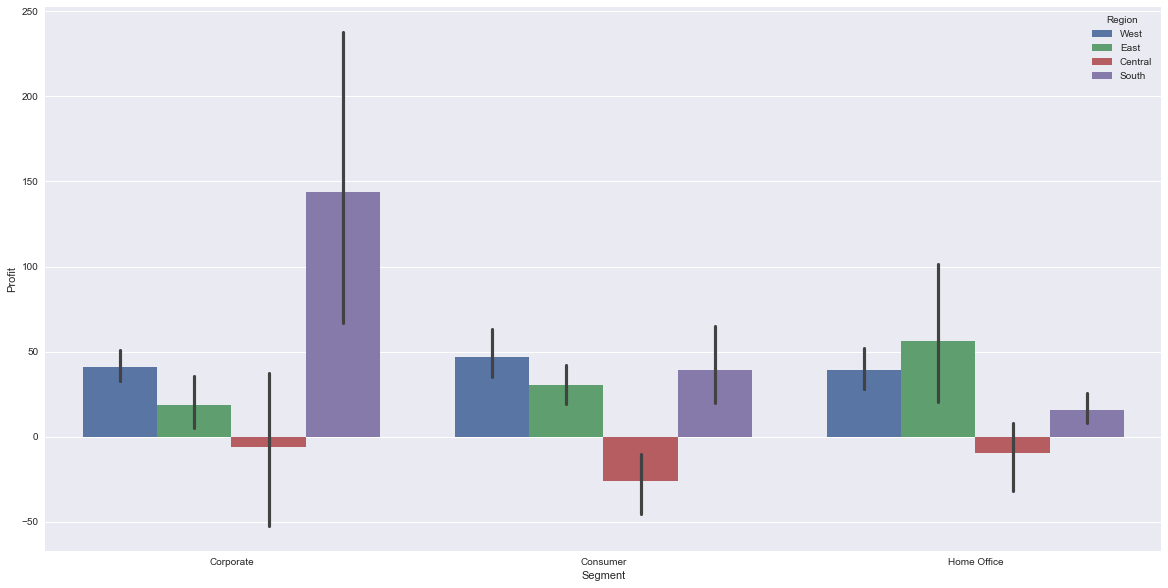

In [370]:
plt.style.use('seaborn')
plt.figure(figsize=(20,10))
sns.barplot(data = df2 , x = "Segment",y = "Profit" ,hue = "Region")

### central region sales needs to be closely monitored especially in case of Consumer segment

<AxesSubplot:xlabel='Ship Mode', ylabel='Profit'>

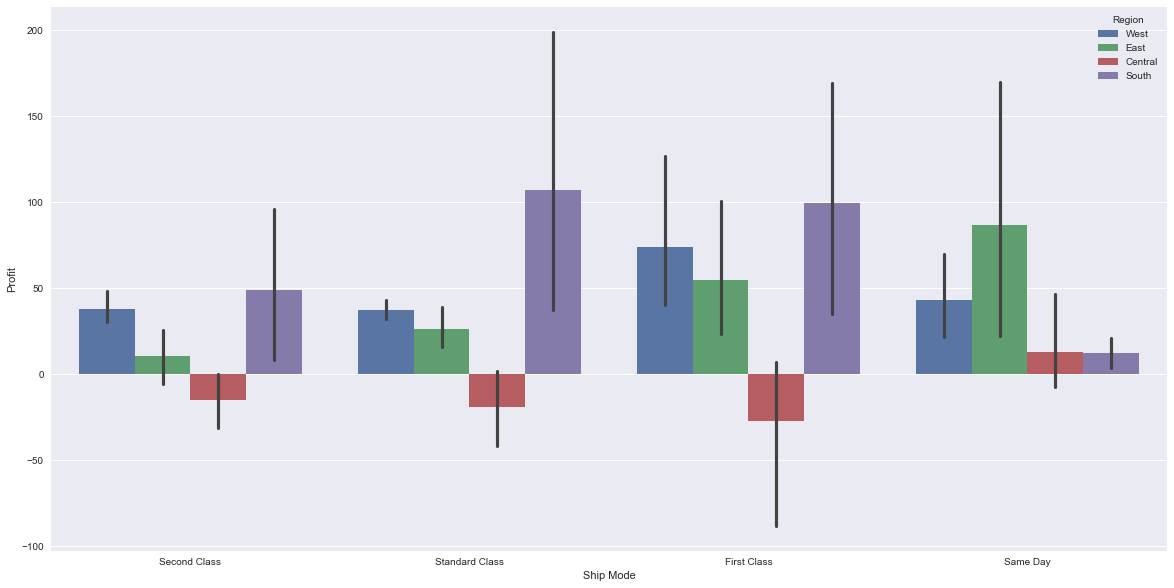

In [371]:
plt.style.use('seaborn')
plt.figure(figsize=(20,10))
sns.barplot(data = df2 , x = "Ship Mode",y = "Profit" ,hue = "Region")

### central region , same day delivery is the safest option, the sales need to be monitored in other modes of shipment in central region. standard class to South region gives best results

# Observation

    1.most number of orders are of quantity 2 or 3

    2.Uptill discount of 0.2 majority of orders were resulting in profit and maximum profit was gained at 0 discount

    3.Mostly 0 deiscount or 0.2 discount is given on orders

    4.Standard class is the most used shipping mode but the sales are more or less same

    5.Most of the orders are from consumer section but most no. sales are to Home office segment

    6.Most no. of sales are placed from new california which is one of the highest profit returning city 
      along with new york

    7.least no. of orders placed are from south region but high return on profit and very high sale

    8.Technology is the least ordered category but has the highest returns of profit and highest in sales
        Most technology related items and furniture are bought from south region

    9.less no. of orders for copiers but very large sale and very high profit
        central region gives the highest sale for copiers

    10.machine sector has really high sales but low profit
        machinery sales need to be monitored in south and central region as we are suffering loses there

    11.we are getting losses from tables

    12.we are getting losses from bookcases

    13.sales of items in category "office Supply" and "Furniture" need to be monitored in the centeral 
       region as we are suffering losses

    14.central region sales needs to be closely monitored especially in case of Consumer segment

    15.same day delivery is the safest option as this has not loss in ship classes, other shipment modes suffer losses only from central region

    
    
# Business Problems_>

    1.Restrain from giving discounts bigger than 0.2

    2.machinery sales need to be monitored in south and central region as we are suffering loses there

    3.we are getting losses from tables

    4.we are getting losses from bookcases

    5.sales of items in category "office Supply" and "Furniture" need to be monitored in the centeral 
      region as we are suffering losses

    6.central region sales needs to be closely monitored especially in case of Consumer segment

    7.shipment modes other than 'same day delivery' suffer losses only from central region

    
    
# Improving profits->

    1.attract more oders from south region
    
    2.attract more sales from Home office segment
    
    3.attract more offers from technology category
    
    4.attract more no. of orders for copiers
    
    5.for orders from central regions do shipments only from same day mode

## Not a part of project, just in case we decide to build a model->

# 3.Data preprocessing for model preperation

In [372]:
###dropping columns->
df=df.drop(columns=['Country','Postal Code'])
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [373]:
###checking if there is any NaN entry in df
df.isnull().values.any()

False

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Region        9994 non-null   object 
 5   Category      9994 non-null   object 
 6   Sub-Category  9994 non-null   object 
 7   Sales         9994 non-null   float64
 8   Quantity      9994 non-null   int64  
 9   Discount      9994 non-null   float64
 10  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 859.0+ KB


## Not a part of project, just in case we decide to build a model

In [375]:
categorical=['Ship Mode', 'Segment', 'City','State','Region','Category','Sub-Category']
continuous=['Sales','Quantity','Discount','Profit']

In [376]:
df_categorical=df[categorical]
df_continuous=df[continuous]
df_categorical.shape,df_continuous.shape

((9994, 7), (9994, 4))

#Now peforming One-Hot-Encoding on Categorical data

In [377]:
df_dummy=pd.get_dummies(df_categorical,drop_first=True)
df_new=pd.concat([df_continuous,df_dummy],axis=1)
df_new

,Sales,Quantity,Discount,Profit,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Corporate,Segment_Home Office,City_Abilene,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,261.9600,2,0.00,41.9136,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,731.9400,3,0.00,219.5820,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14.6200,2,0.00,6.8714,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,957.5775,5,0.45,-383.0310,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,22.3680,2,0.20,2.5164,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,25.2480,3,0.20,4.1028,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9990,91.9600,2,0.00,15.6332,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9991,258.5760,2,0.20,19.3932,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9992,29.6000,4,0.00,13.3200,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
